# Import the used Libiraries

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import joblib
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Load the data

In [4]:
full_data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\New folder\Life Expectancy Data.csv")
full_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**The details of the data:**
* **Country**
* **Year**
* **Status**: Developed or Developing status
* **Life expectancy**: Life Expectancy in age
* **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **infant deaths**: Number of Infant Deaths per 1000 population
* **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* **percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles**: Measles - number of reported cases per 1000 population
* **BMI**: Average Body Mass Index of entire population
* 

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
full_data = full_data.dropna(subset=['Life expectancy '])

In [8]:
# Splitiing the data 
X = full_data.drop('Life expectancy ', axis=1)
y = full_data['Life expectancy ']

train_data,test_data = train_test_split(full_data, test_size=.2, random_state=42)

In [9]:
train_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            155
percentage expenditure               0
Hepatitis B                        444
Measles                              0
 BMI                                26
under-five deaths                    0
Polio                               14
Total expenditure                  182
Diphtheria                          14
 HIV/AIDS                            0
GDP                                347
Population                         511
 thinness  1-19 years               26
 thinness 5-9 years                 26
Income composition of resources    130
Schooling                          130
dtype: int64

we have some null values, i will handle it later

In [10]:
train_data.duplicated().sum()

0

In [11]:
# Statistical summary
train_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2342.000000,2342.000000,2342.000000,2342.000000,2187.000000,2342.000000,1898.000000,2342.000000,2316.000000,2342.000000,2328.000000,2160.000000,2328.000000,2342.000000,1995.000000,1.831000e+03,2316.000000,2316.000000,2212.000000,2212.000000
mean,2007.550811,69.149018,166.111870,30.203245,4.605048,724.095466,80.747629,2431.453032,38.053843,42.124680,82.365120,5.904861,81.946306,1.791503,7411.152515,1.189263e+07,4.874266,4.915889,0.626962,12.001582
std,4.605192,9.577461,124.282313,113.818683,4.031513,1930.640716,25.124593,11436.680183,20.059322,156.118351,23.415307,2.512567,24.078516,5.183774,14218.238893,5.458953e+07,4.442687,4.541199,0.208389,3.347900
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.000000,74.000000,0.000000,0.930000,5.310443,76.000000,0.000000,19.200000,0.000000,77.000000,4.240000,78.000000,0.100000,459.374206,2.147500e+05,1.600000,1.500000,0.491000,10.100000
50%,2008.000000,72.000000,145.000000,3.000000,3.720000,65.268121,92.000000,17.000000,42.850000,4.000000,93.000000,5.700000,92.000000,0.100000,1732.857979,1.445958e+06,3.300000,3.300000,0.675500,12.300000
75%,2012.000000,75.600000,228.000000,22.000000,7.645000,433.327131,96.000000,357.750000,56.100000,29.000000,97.000000,7.492500,97.000000,0.800000,5780.167745,7.530842e+06,7.200000,7.300000,0.779000,14.200000
max,2015.000000,89.000000,717.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


> infant deaths, under-five deaths and Measles should be a numper / per 1000 population the should be smaller than 1000


In [12]:
copy = train_data.copy()


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

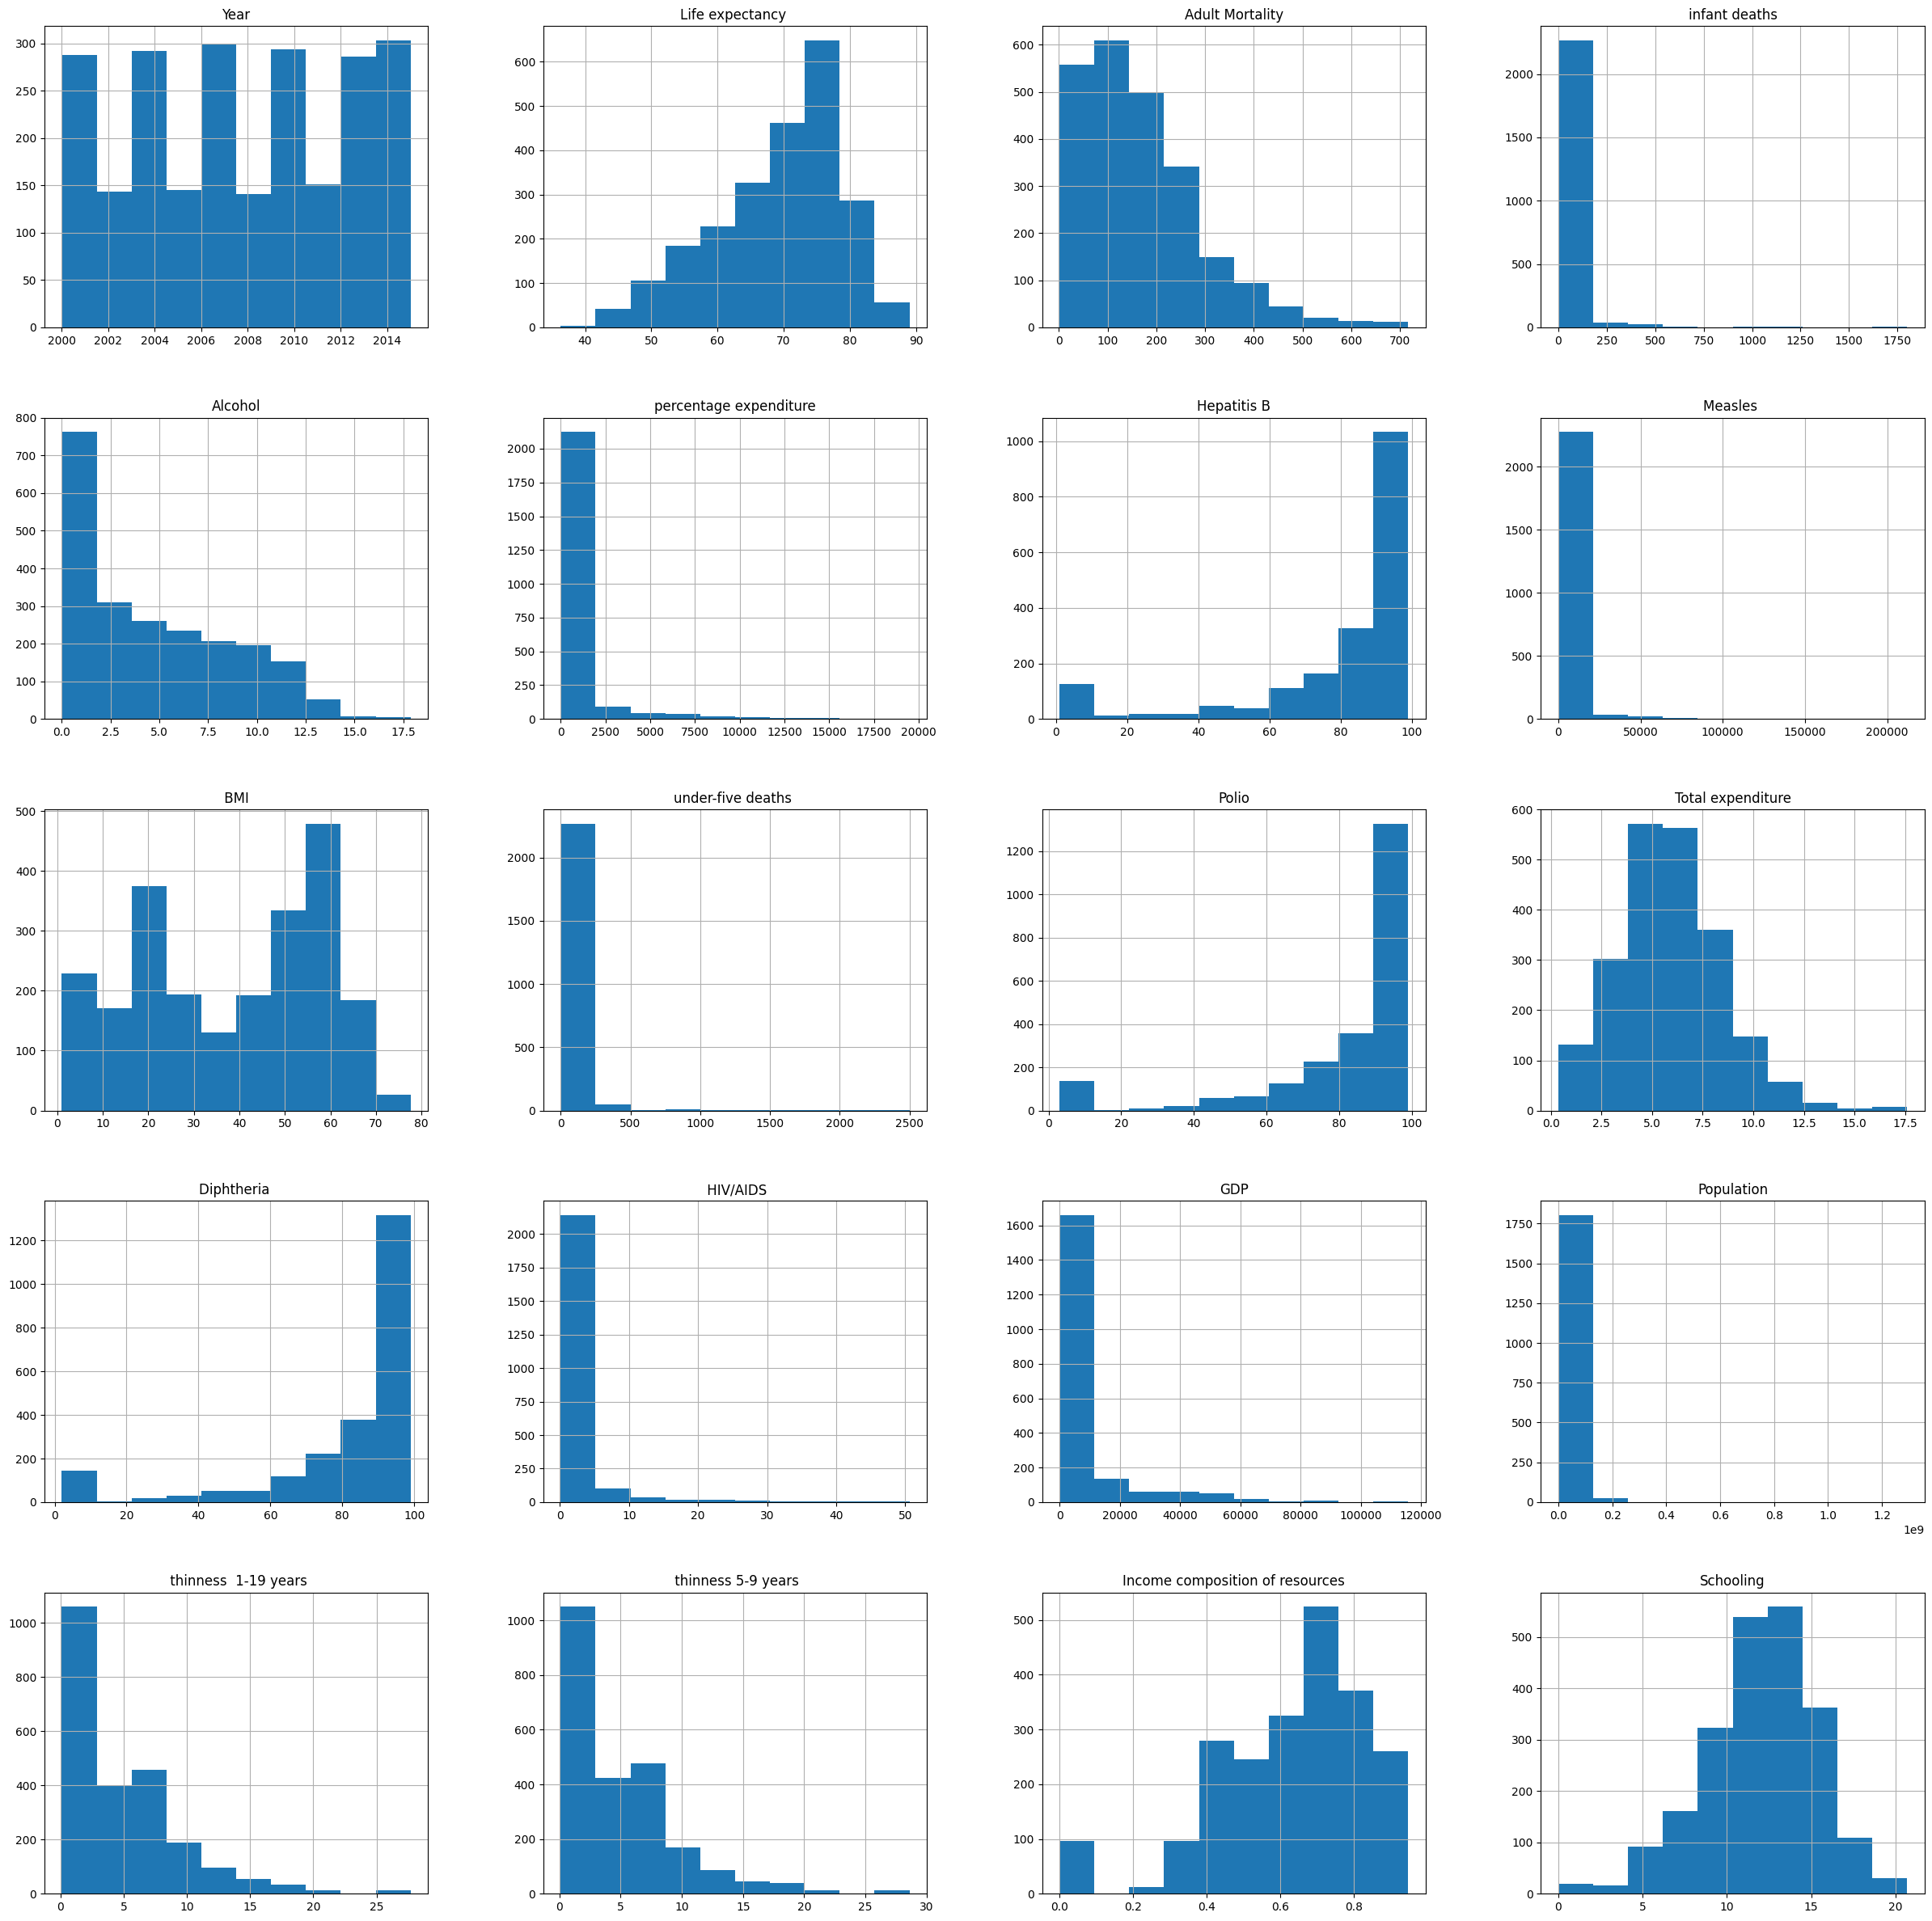

In [13]:
train_data.hist(figsize=(30, 30))

# Numerical columns

In [14]:
numeric_col = train_data.select_dtypes(include= "number").columns
numeric_cols = numeric_col[numeric_col != 'Life expectancy ']

In [15]:
original_skewness = train_data[numeric_cols].skew()
original_skewness

Year                               -0.006814
Adult Mortality                     1.169312
infant deaths                       9.709195
Alcohol                             0.597701
percentage expenditure              4.512307
Hepatitis B                        -1.908250
Measles                             9.402678
 BMI                               -0.206544
under-five deaths                   9.418616
Polio                              -2.064445
Total expenditure                   0.606437
Diphtheria                         -2.041765
 HIV/AIDS                           5.359182
GDP                                 3.112649
Population                         17.605151
 thinness  1-19 years               1.673095
 thinness 5-9 years                 1.734047
Income composition of resources    -1.097248
Schooling                          -0.525447
dtype: float64

In [16]:
positive_skewed = original_skewness[original_skewness>.5].index
negative_skewed = original_skewness[original_skewness< -.5].index
symmetric_distributed = [" BMI "]

before trying some transformers to moderate the skewness, i will handel the missing values 

# Handeling Missing values 

In [17]:
# handel missing values 
imputer = SimpleImputer(strategy="median")
imputer1 = SimpleImputer(strategy="mean")
copy[positive_skewed] = imputer.fit_transform(copy[positive_skewed])
copy[negative_skewed] = imputer.fit_transform(copy[negative_skewed])
copy[symmetric_distributed] = imputer1.fit_transform(copy[symmetric_distributed])
copy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#  Handling Positive skewed featers

In [18]:


# Skewness function
def calculate_skewness(df):
    return df.apply(skew)

# Create different transformers
log_transformer = FunctionTransformer(np.log1p, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
quantile = QuantileTransformer(output_distribution='normal')

# List of transformers
transformers = {
    'Log': log_transformer,
    'Square Root': sqrt_transformer,
    'Yeo-Johnson': yeo_transformer,
    'quantile' : quantile
}

# Assuming 'copy' is your DataFrame and 'positive_skewed' is a list of skewed columns
# Dataframe to store the skewness results
results_df = pd.DataFrame(index=transformers.keys(), columns=copy[positive_skewed].columns)

# Compute skewness for the original data and store as a row
results_df.loc['Original'] = calculate_skewness(copy[positive_skewed])

# Apply each transformer and calculate skewness
for name, transformer in transformers.items():
    transformed_data = transformer.fit_transform(copy[positive_skewed])
    transformed_df = pd.DataFrame(transformed_data, columns=positive_skewed)
    skewness1 = calculate_skewness(transformed_df)
    
    # Store the skewness for each feature in the table
    results_df.loc[name] = skewness1

# Display results
results_df


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years
Log,-1.133794,0.689955,-0.326771,-0.089191,0.557901,0.636356,-0.685478,2.094164,-0.136269,-0.769114,0.132035,0.102112
Square Root,0.092039,3.447281,-0.137892,2.335677,4.138521,3.368304,-0.172737,2.824554,1.982973,4.942498,0.604102,0.597613
Yeo-Johnson,-0.077082,0.173936,-0.082547,-0.015783,0.183615,0.165851,0.021198,0.949369,0.001029,0.034478,0.018665,0.013489
quantile,-0.329507,-0.749547,-1.719960,-1.141461,-0.556363,-0.846530,-0.001280,0.449192,0.007687,-0.003598,-0.738991,-0.954942
Original,1.168563,9.702976,0.659422,4.509416,9.396655,9.412582,0.650288,5.355749,3.432692,19.797343,1.689219,1.750358


**Yeo-Johnson** is the most suitable for posistive skewed features

In [19]:
# Apply Yeo-Johnson on copy data
copy[positive_skewed] = yeo_transformer.fit_transform(copy[positive_skewed])

# Handeling Negative Skewed Features

In [20]:
# Create transformers for negative skewed features
exp_transformer = FunctionTransformer(np.exp, validate=True)        # exp(x)
square_transformer = FunctionTransformer(np.square, validate=True)  # x^2
cube_transformer = FunctionTransformer(lambda x: np.power(x, 3), validate=True)  # x^3
reciprocal_transformer = FunctionTransformer(lambda x: 1 / (x + 1e-6), validate=True)  # 1/x to avoid division by zero
log_transformer = FunctionTransformer(np.log1p, validate=True)
quantile = QuantileTransformer(output_distribution='normal')
# List of transformers
transformers = {
    'Exponential': exp_transformer,
    'Square': square_transformer,
    'Cube': cube_transformer,
    'Reciprocal': reciprocal_transformer,
    'Log': log_transformer,
    'quantile' : quantile
}

results_df1 = pd.DataFrame(index=transformers.keys(), columns=copy[negative_skewed].columns)

# Compute skewness for the original data and store as a row
results_df1.loc['Original'] = calculate_skewness(copy[negative_skewed])

# Apply each transformer and calculate skewness
# Apply each transformer and calculate skewness
for name, transformer in transformers.items():
    transformed_data = transformer.fit_transform(copy[negative_skewed])
    transformed_df = pd.DataFrame(transformed_data, columns=negative_skewed)
    skewness = calculate_skewness(transformed_df)
    
    # Store the skewness for each feature in the table
    results_df1.loc[name] = skewness


# Display results
results_df1

,Hepatitis B,Polio,Diphtheria,Income composition of resources,Schooling
Exponential,2.578242,1.863644,2.013713,-0.549697,11.679025
Square,-1.588959,-1.328860,-1.352260,-0.082140,0.461514
Cube,-1.186652,-0.936070,-0.956839,0.408732,1.191733
Reciprocal,10.737916,4.727236,5.078404,4.630181,10.966829
Log,-3.265999,-3.185281,-3.080196,-1.678782,-3.458857
quantile,1.778841,1.517561,1.610259,-1.731789,-0.679290
Original,-2.259174,-2.073088,-2.050449,-1.162285,-0.555173


Cupe transformer is the most suitable for negative skewed

In [21]:
# Aplly cupe transformer
copy[negative_skewed] = square_transformer.fit_transform(copy[negative_skewed])

In [22]:
copy[numeric_cols].skew()

Year                              -0.006814
Adult Mortality                   -0.077132
infant deaths                      0.174048
Alcohol                           -0.082600
percentage expenditure            -0.015793
Hepatitis B                       -1.589978
Measles                            0.183733
 BMI                              -0.207699
under-five deaths                  0.165958
Polio                             -1.329711
Total expenditure                  0.021212
Diphtheria                        -1.353127
 HIV/AIDS                          0.949978
GDP                                0.001030
Population                         0.034500
 thinness  1-19 years              0.018677
 thinness 5-9 years                0.013498
Income composition of resources   -0.082192
Schooling                          0.461810
dtype: float64

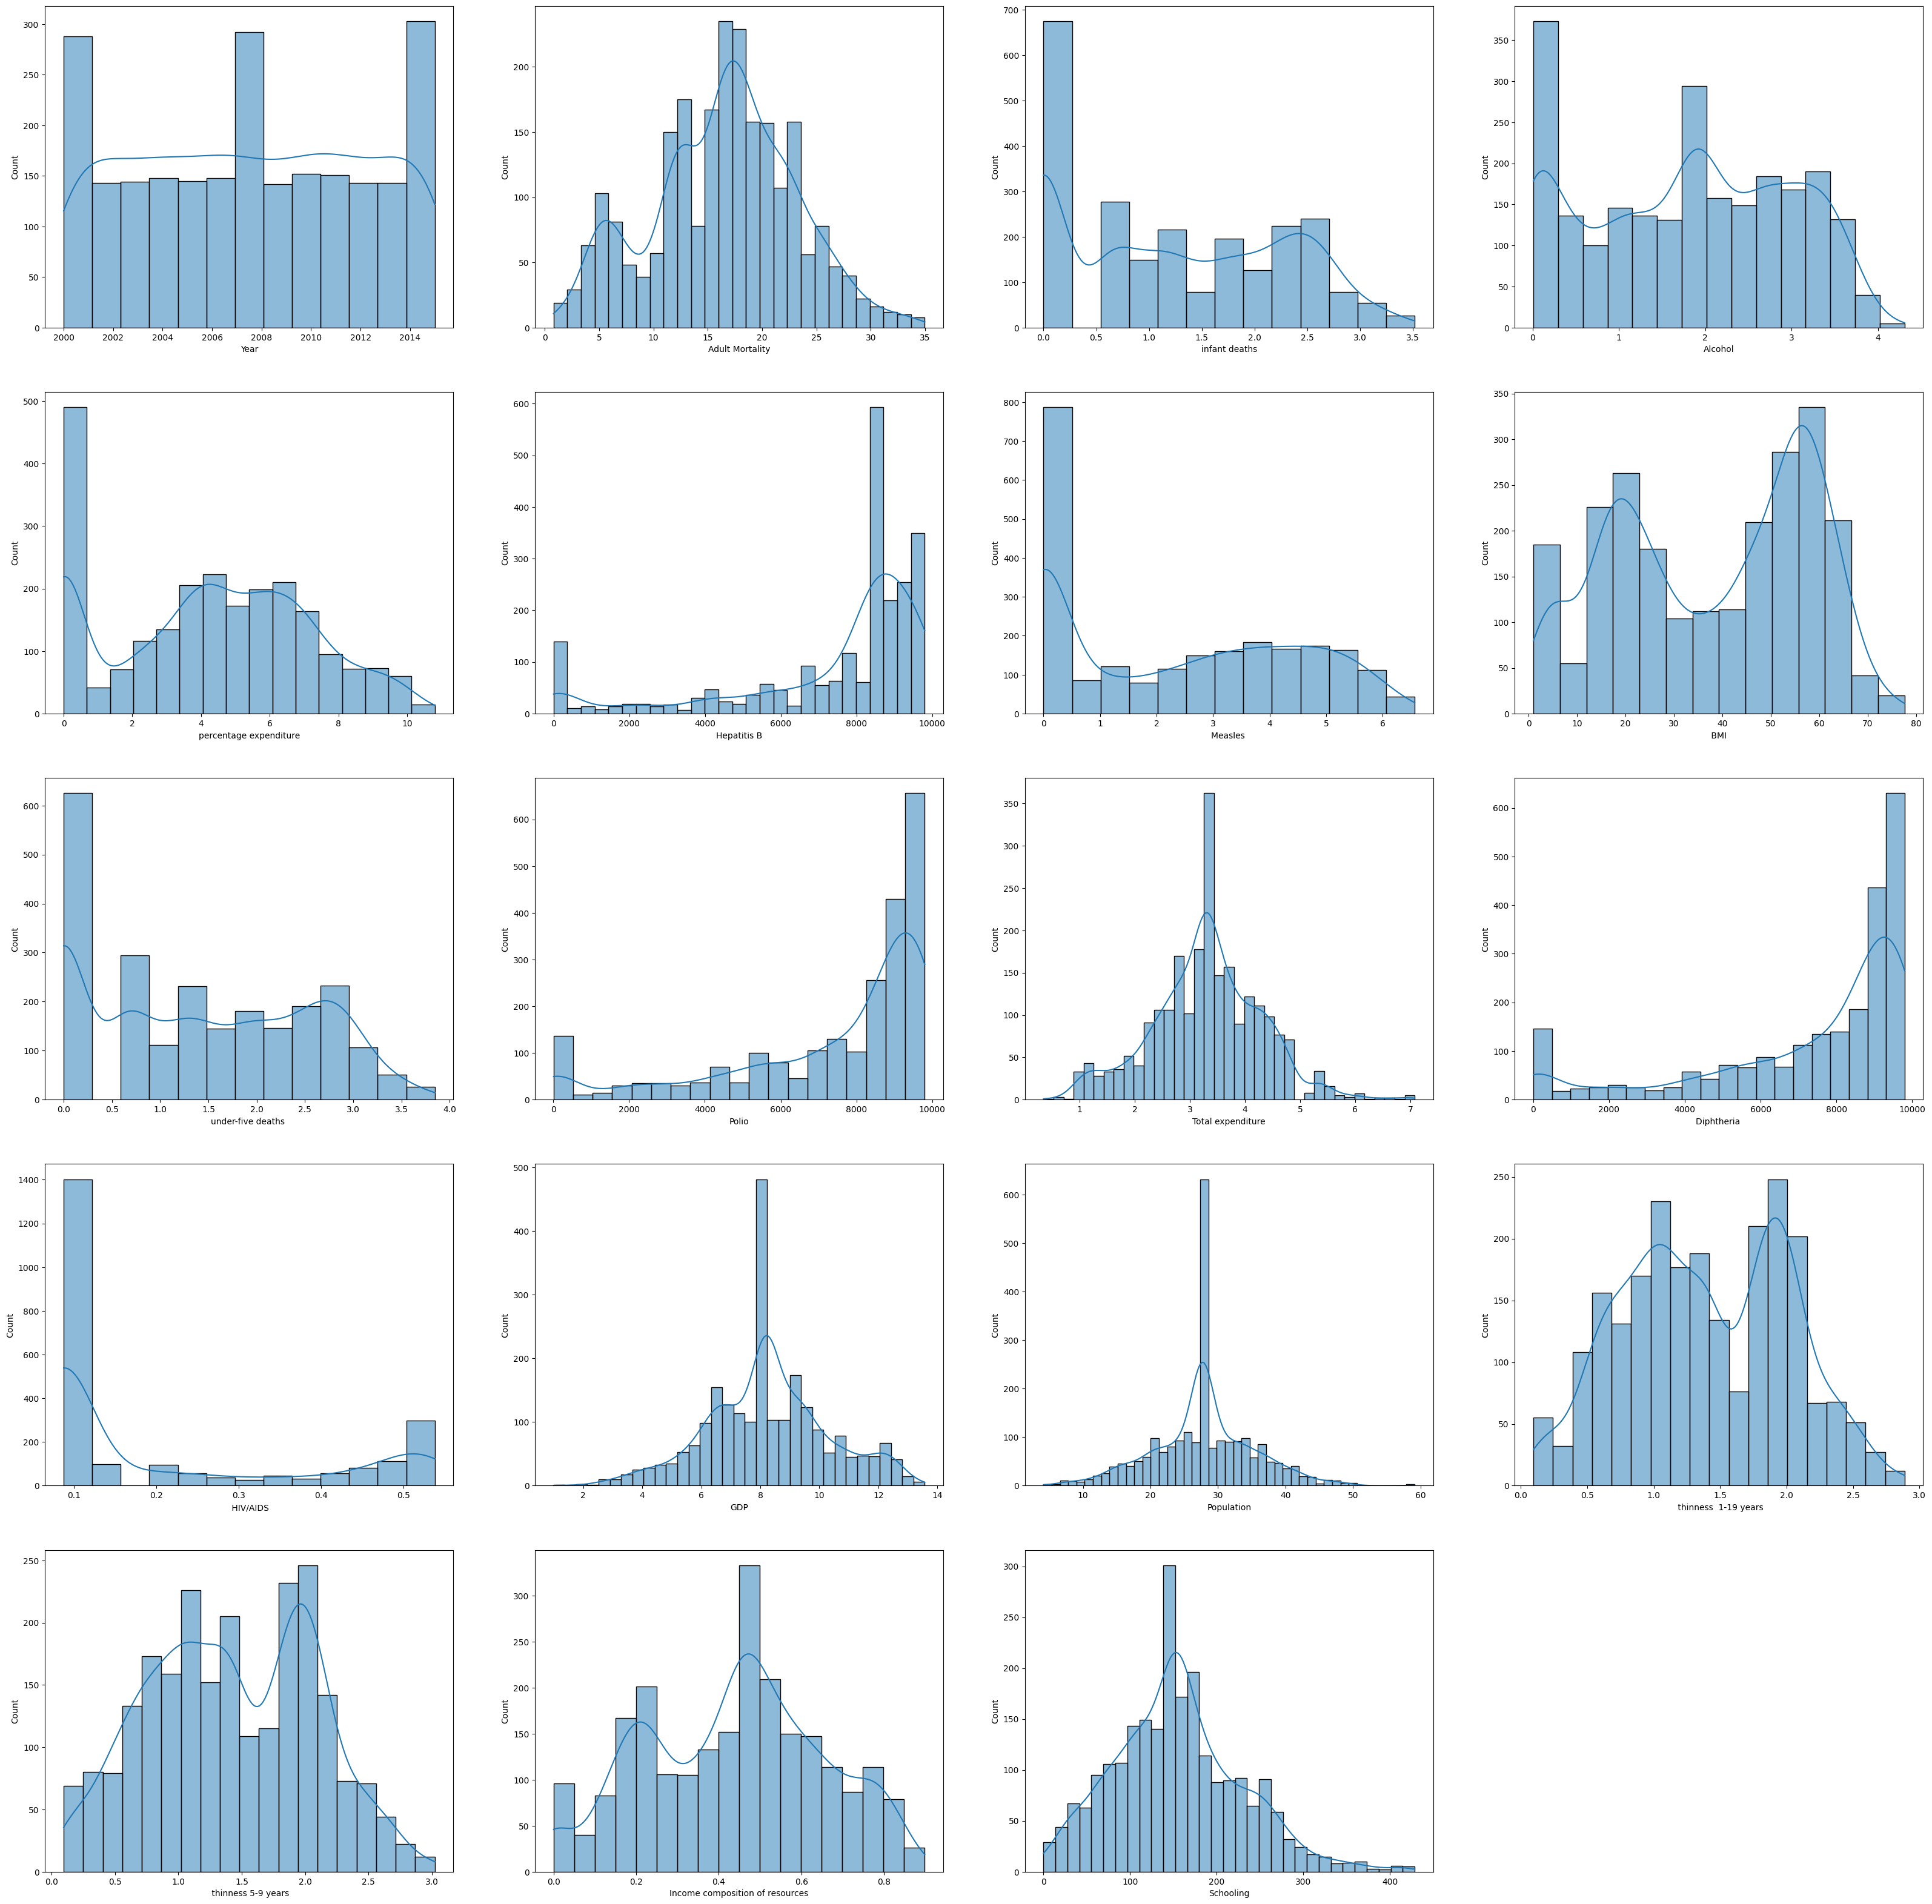

In [23]:
fig = plt.figure(figsize= (40, 40))
c = 1
for col in numeric_cols:
    plt.subplot(5, 4,c)
    g = sns.histplot(copy[col], kde=True)
    g.set(xlabel = col)
    c = c + 1

# Categorical Columns

In [24]:
categorical_cols = copy.select_dtypes(include='object').columns
categorical_cols

Index(['Country', 'Status'], dtype='object')

In [25]:
print(copy['Country'].nunique())
copy['Country'].unique()

183


array(['Serbia', 'Mauritius', 'United Republic of Tanzania', 'Sweden',
       'Guinea-Bissau', 'New Zealand', 'Tunisia', 'Saudi Arabia', 'Chad',
       'Iceland', 'Ukraine', 'Saint Lucia', 'Tajikistan', 'Switzerland',
       'Ireland', 'Uzbekistan', 'Lebanon', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Dominican Republic',
       "Côte d'Ivoire", 'Belarus', 'Armenia', 'Pakistan', 'Bahamas',
       'Spain', 'Belgium', 'Nicaragua', 'Ghana', 'Djibouti',
       "Lao People's Democratic Republic", 'Guyana', 'Seychelles',
       'Grenada', 'Italy', 'Viet Nam', 'Singapore', 'Eritrea', 'Slovenia',
       'Cabo Verde', 'Azerbaijan', 'Namibia', 'Myanmar', 'Malawi',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Bolivia (Plurinational State of)', 'Turkmenistan', 'Haiti',
       'Samoa', 'Belize', 'Philippines', 'Estonia', 'Bahrain', 'Somalia',
       'Papua New Guinea', 'Swaziland', 'Cameroon', 'Mauritania',
       'Panama', 'Guatem

In [26]:
# Dictionary mapping countries to their respective regions (continents)
country_to_region = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Bolivia (Plurinational State of)': 'South America', 
    'South Sudan': 'Africa', 'Finland': 'Europe', 'Cyprus': 'Europe', 'Uruguay': 'South America', 'Belize': 'North America',
    'United Republic of Tanzania': 'Africa', 'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia',
    'Bahrain': 'Asia', 'Ukraine': 'Europe', 'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania',
    'Cuba': 'North America', 'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa', 'Spain': 'Europe',
    'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America', 'Sao Tome and Principe': 'Africa',
    'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa',
    'Antigua and Barbuda': 'North America', 'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe',
    'Nigeria': 'Africa', 'Benin': 'Africa', 'The former Yugoslav republic of Macedonia': 'Europe',
    'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa', 'Trinidad and Tobago': 'North America', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Lithuania': 'Europe', 'Sudan': 'Africa', 'Costa Rica': 'North America',
    'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia', 'Sri Lanka': 'Asia',
    'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America', 'Panama': 'North America',
    'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia', 'Haiti': 'North America', 'Iraq': 'Asia',
    'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia', 'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America',
    'Maldives': 'Asia', 'Gabon': 'Africa', 'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa',
    'Niue': 'Oceania', 'Latvia': 'Europe', 'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa',
    'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania', 'Argentina': 'South America', 'Cambodia': 'Asia',
    'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia', 'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America',
    'Thailand': 'Asia', 'Bangladesh': 'Asia', 'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa',
    'Czechia': 'Europe', 'Niger': 'Africa', 'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia',
    'Jordan': 'Asia', 'Russian Federation': 'Europe', 'Syrian Arab Republic': 'Asia',
    'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania',
    'Palau': 'Oceania', 'Monaco': 'Europe', 'Dominica': 'North America'
}
# Add the 'Region' column based on the 'Country' column
def creat_Region_col(df, mapping=country_to_region):
    df["Region"] =df['Country'].map(country_to_region) 

#Apllying on copy
creat_Region_col(copy)

In [27]:
copy['Region'].value_counts()

Africa           696
Asia             576
Europe           508
North America    269
South America    159
Oceania          134
Name: Region, dtype: int64

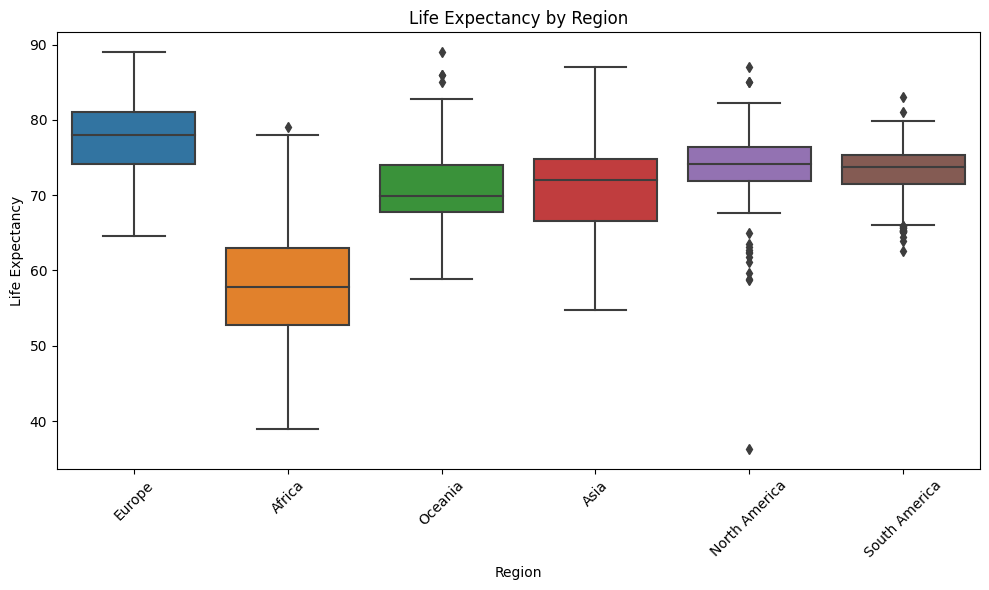

In [28]:
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the boxplot to show the distribution of life expectancy per region
sns.boxplot(x='Region', y='Life expectancy ', data=copy)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')

# Show the plot
plt.tight_layout()
plt.show()

We Notice that:
* Africa has the lowest life expectancy with a wide variation between countries.
* North America, Oceania, and Europe have higher and relatively consistent life expectancy values.
* Asia and South America show moderate life expectancy, with South America having more outliers.
* The presence of outliers in North America and South America indicates some countries in these regions have significantly lower life expectancy than others within the same region.

> i will drop the Country column as Region is more insightfull

In [29]:
copy.drop('Country',axis=1 ,inplace=True)

In [30]:
copy

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
2268,2012,Developing,74.9,15.719955,0.639464,3.162959,7.018373,9409.0,-0.000000,58.3,0.645157,8649.0,4.846959,8281.0,0.087352,9.662058,25.485539,1.074504,1.088681,0.588289,196.00,Europe
1680,2002,Developing,71.5,18.561369,-0.000000,2.015548,6.239624,7744.0,-0.000000,26.4,-0.000000,7744.0,2.668623,7744.0,0.087352,9.218753,20.284508,1.980229,2.030285,0.466489,156.25,Africa
2785,2008,Developing,56.2,26.144762,2.784403,1.800493,0.000000,7396.0,5.278076,19.6,3.075231,7921.0,2.654683,7396.0,0.528159,8.210684,27.781663,1.922967,1.970050,0.456300,151.29,Africa
2512,2008,Developed,81.1,11.120895,-0.000000,2.693551,9.765781,8464.0,2.715987,56.5,-0.000000,9604.0,4.625604,9604.0,0.087352,12.594608,34.596054,0.801794,0.809600,0.804609,246.49,Europe
1090,2015,Developing,58.9,22.658587,1.339261,1.889387,0.000000,7569.0,3.820526,26.3,1.598009,7569.0,3.307475,7569.0,0.501024,6.941310,21.271467,1.902869,1.938163,0.177241,84.64,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,2009,Developed,82.0,11.210108,-0.000000,2.792315,6.132378,7396.0,0.666168,67.1,-0.000000,5329.0,4.312787,5329.0,0.087352,8.738257,23.747844,0.572175,0.521103,0.664225,207.36,Europe
1097,2008,Developing,55.6,23.474309,1.461360,1.520761,3.481819,8464.0,2.220396,21.9,1.685593,5929.0,3.630071,5929.0,0.523990,6.914803,20.776128,2.033423,2.077256,0.158404,77.44,Africa
1132,2005,Developing,65.0,7.518777,2.095678,2.393955,3.789301,8464.0,-0.000000,38.5,2.341166,36.0,2.746928,36.0,0.510354,6.649927,26.299554,1.562076,1.592661,0.204304,67.24,North America
1296,2001,Developed,79.8,12.222752,0.967839,3.215462,1.434497,9025.0,-0.000000,55.7,1.203091,9216.0,4.234219,8649.0,0.087352,3.389006,24.745286,0.397995,0.399887,0.685584,222.01,Europe


In [31]:
copy['Status'].value_counts()

Developing    1937
Developed      405
Name: Status, dtype: int64

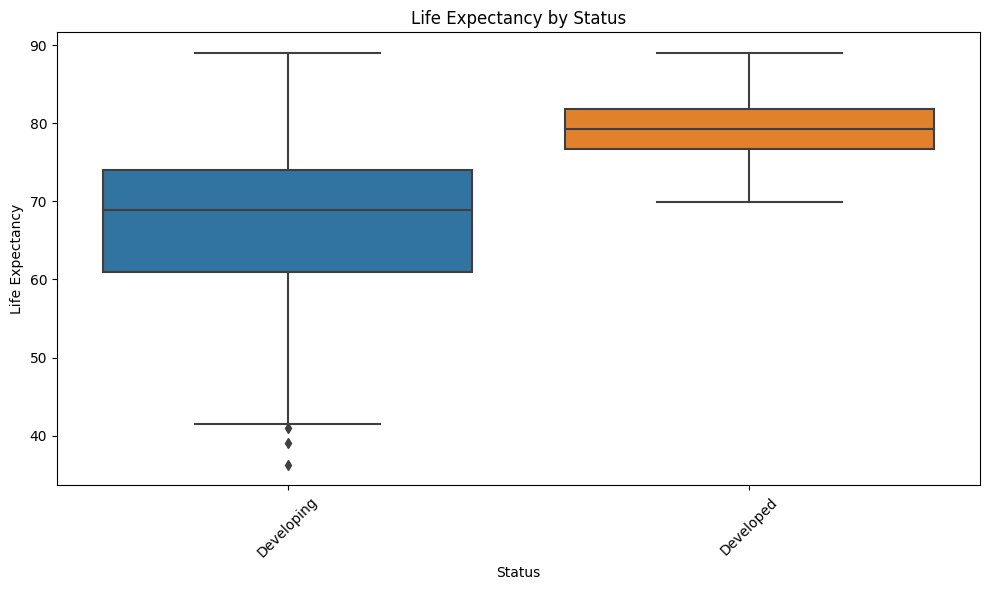

In [32]:
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the boxplot to show the distribution of life expectancy per status
sns.boxplot(x='Status', y='Life expectancy ', data=copy)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')

# Show the plot
plt.tight_layout()
plt.show()

> we notic that
* developed countries generally have higher and more consistent life expectancy compared to developing countries, which show greater variability and more cases of lower life expectancy.

Status && Region will be **ordinal incoded**

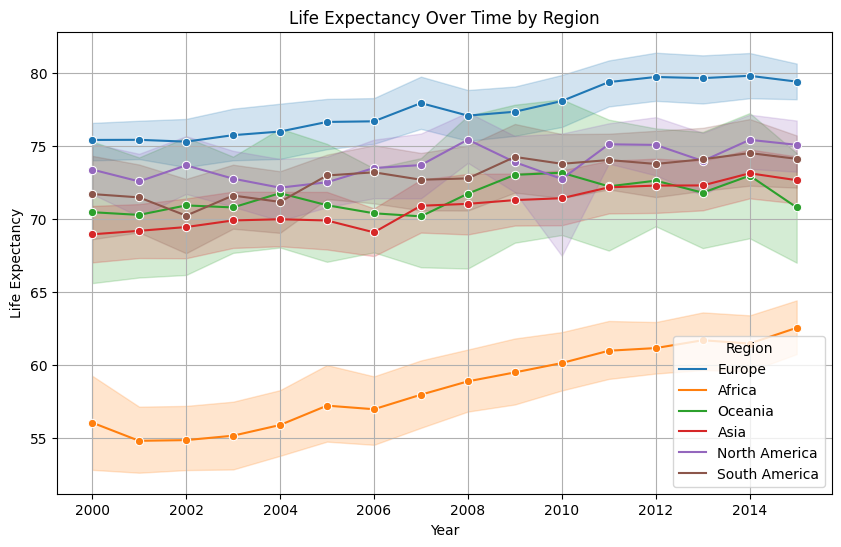

In [33]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=copy, x='Year', y='Life expectancy ', hue='Region', marker='o')

# Add title and labels
plt.title('Life Expectancy Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Region')
plt.grid(True)

# Show the plot
plt.show()

In [34]:
symmetric_distributed
copy[ ' BMI ']

2268    58.3
1680    26.4
2785    19.6
2512    56.5
1090    26.3
        ... 
1640    67.1
1097    21.9
1132    38.5
1296    55.7
862     13.3
Name:  BMI , Length: 2342, dtype: float64

In [35]:
# Creat'LifeExpectancyChange' column calculate the year-on-year change in life expectancy within each region.
copy['LifeExpectancyChange'] = copy.groupby('Region')['Life expectancy '].diff()

In [36]:
copy['LifeExpectancyChange'].isnull().sum()

6

In [37]:
# fill nan values in LifeExpectancyChange with the mean of LifeExpectancyChange for each region
mean_life_change_by_region = copy.groupby('Region')['LifeExpectancyChange'].transform('mean')
#Fill NaN values with the calculated mean for each Region
copy['LifeExpectancyChange'].fillna(mean_life_change_by_region, inplace=True)

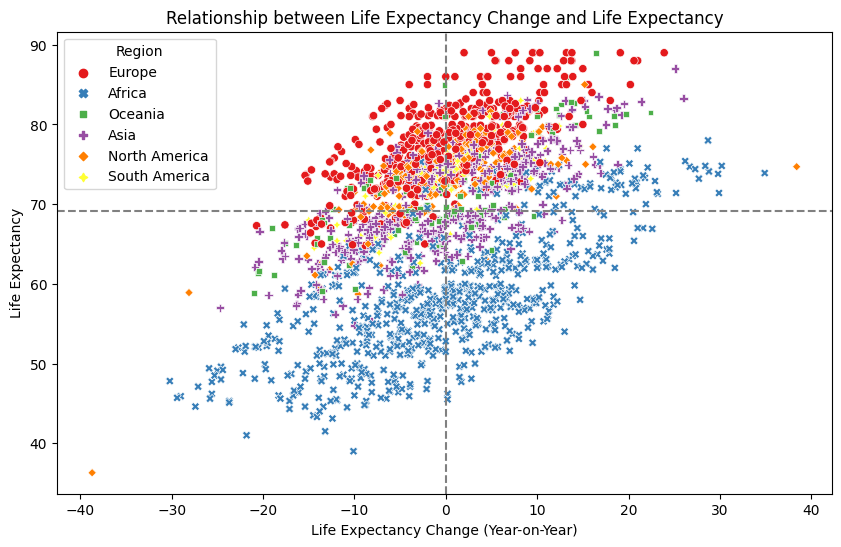

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=copy, x='LifeExpectancyChange', y='Life expectancy ' , hue='Region', style='Region', palette='Set1')

# Step 3: Enhance the plot
plt.title('Relationship between Life Expectancy Change and Life Expectancy')
plt.xlabel('Life Expectancy Change (Year-on-Year)')
plt.ylabel('Life Expectancy')
plt.axhline(y=copy['Life expectancy '].mean(), color='gray', linestyle='--')  # Adding a horizontal line at the mean life expectancy
plt.axvline(x=0, color='gray', linestyle='--')  # Adding a vertical line at 0 life expectancy change

# Show the plot
plt.show()

'LifeExpectancyChange' is highly positive correlated with 'Life expectancy'

# Pipline

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [40]:
creat_Region_col(X_train)
creat_Region_col(X_test)
X_train.drop('Country', axis=1, inplace=True)
X_test.drop('Country', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)
train_data.drop('Year', axis=1, inplace = True)

numeric_col = train_data.select_dtypes(include= "number").columns
cat_cols = X_train.select_dtypes(include = 'object').columns


In [41]:
def cube_transform(x):
    return np.power(x, 3)

In [42]:



# Pipeline for positive skewed features
positive_skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transformer', PowerTransformer(method='yeo-johnson', standardize=False))
])

# Pipeline for negative skewed features
negative_skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('cube_transformer', FunctionTransformer(np.square, validate=True))
])

# Pipeline for symmetric distributed features
symmetric_distributed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])


# Define the ColumnTransformer to combine the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('pos_skew', positive_skewed_pipeline, positive_skewed),
        ('neg_skew', negative_skewed_pipeline, negative_skewed),
        ('sym_dist', symmetric_distributed_pipeline, symmetric_distributed),
        ('cat', categorical_pipeline, cat_cols)
    ]
)




In [43]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [44]:
from sklearn.model_selection import GridSearchCV
# Define base estimators for the Voting Regressor
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor())
]

# Define the Voting Regressor
voting_reg = VotingRegressor(estimators=estimators)

# Define hyperparameters to tune
param_grid = {
    'dt__max_depth': [None, 10, 20],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20]
}

# Set up the grid search
grid_search = GridSearchCV(voting_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

Best parameters found:  {'dt__max_depth': 20, 'rf__max_depth': None, 'rf__n_estimators': 50}


In [45]:

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² score: ", r2)

Mean Absolute Error (MAE):  1.488723329984653
R² score:  0.9484311203054023


In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

# Define the base models
base_models = [
    ('et', ExtraTreesRegressor(n_estimators=300, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

# Define the meta model (final estimator)
meta_model = LinearRegression()

# Create the Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE): ", mae)
print("R² score: ", r2)

Mean Absolute Error (MAE):  0.8765606812190366
R² score:  0.972965211389727


In [47]:
import joblib

# Save model and preprocessor with compression
joblib.dump(stacked_model, 'model_compressed.pkl', compress=3)  # Adjust compression level (0-9, 3 is a good trade-off)
joblib.dump(preprocessor, 'preprocessor_compressed.pkl', compress=3)


['preprocessor_compressed.pkl']